# Saisonale Komponente untersuchen

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
#Training set
df_training = pd.read_csv('training_data_integrated.csv', index_col='Datetime', parse_dates=True)

#Test set
df_test = pd.read_csv('2022_data_integrated.csv', index_col='Datetime', parse_dates=True)

In [4]:
#Saisonale Zerlegung
period=8760 #Stündlich, ohne Beachtung der Schaltjahre

decomposition_Bonn = seasonal_decompose(df_training['Bonn2016-2021'], period=period)
decomposition_Temp = seasonal_decompose(df_training['Temperature (°C)'], period=period)
decomposition_Rain = seasonal_decompose(df_training['Precipitations (mm)'], period=period)
decomposition_Wind = seasonal_decompose(df_training['Wind Speed (m/s)'], period=period)

<Figure size 640x480 with 0 Axes>

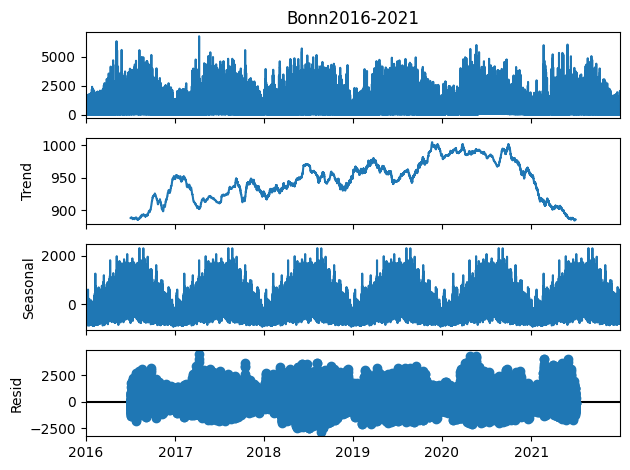

Test auf Stationarität:
Teststatistik = -15.8644
Signifikanz = 0.0000


In [30]:
#Saisonale Zerlegung für die Gesamtzählungen in Bonn 2016-2021
plt.figure()
decomposition_Bonn.plot()
plt.show()

result_Bonn = adfuller(df_training['Bonn2016-2021'])
print("Test auf Stationarität:")
print("Teststatistik = {:.4f}".format(result_Bonn[0]))
print("Signifikanz = {:.4f}".format(result_Bonn[1]))

<Figure size 640x480 with 0 Axes>

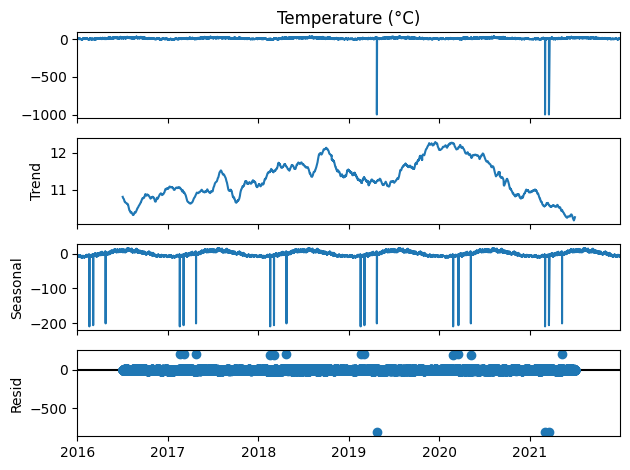

Test auf Stationarität:
Teststatistik = -9.3837
Signifikanz = 0.0000


In [26]:
#Zerlegung für Temperaturen
plt.figure()
decomposition_Temp.plot()
plt.show()

result_Temp = adfuller(df_training['Temperature (°C)'])
print("Test auf Stationarität:")
print("Teststatistik = {:.4f}".format(result_Temp[0]))
print("Signifikanz = {:.4f}".format(result_Temp[1]))

<Figure size 640x480 with 0 Axes>

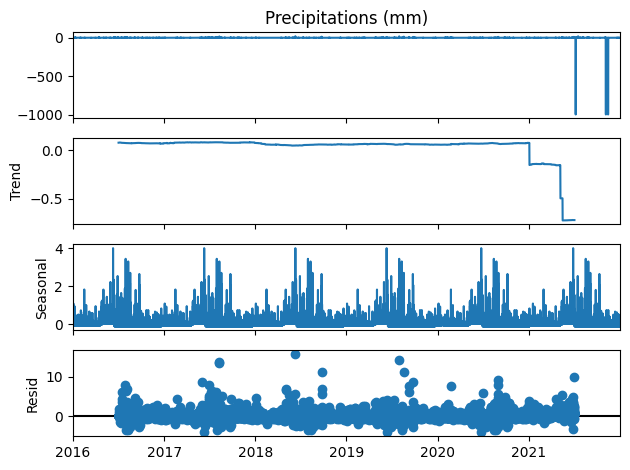

Test auf Stationarität:
Teststatistik = -79.7664
Signifikanz = 0.0000


In [28]:
#Zerlegung für Niederschlag
plt.figure()
decomposition_Rain.plot()
plt.show()

result_Rain = adfuller(df_training['Precipitations (mm)'])
print("Test auf Stationarität:")
print("Teststatistik = {:.4f}".format(result_Rain[0]))
print("Signifikanz = {:.4f}".format(result_Rain[1]))

<Figure size 640x480 with 0 Axes>

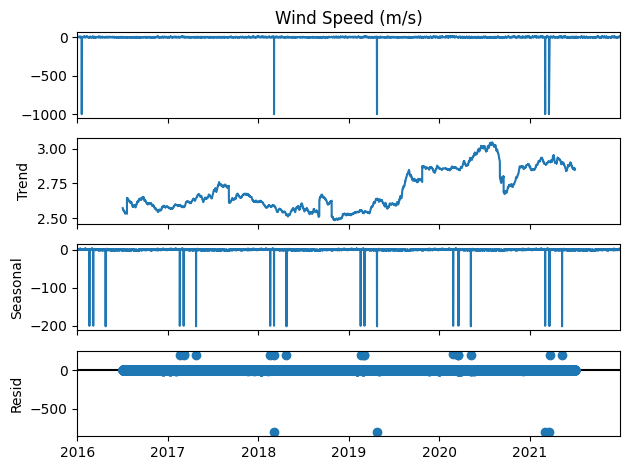

Test auf Stationarität:
Teststatistik = -39.4753
Signifikanz = 0.0000


In [29]:
#Zerlegung für Windstärke
plt.figure()
decomposition_Wind.plot()
plt.show()

result_Wind = adfuller(df_training['Wind Speed (m/s)'])
print("Test auf Stationarität:")
print("Teststatistik = {:.4f}".format(result_Wind[0]))
print("Signifikanz = {:.4f}".format(result_Wind[1]))

## Fazit:
Die Zeitreihe der Fahrradzählungen ist durch ihre Saisonale Komponente offensichtlich nicht stationär, jedoch ist die saisonalität so stark, dass sie die nicht-stationären Komponenten so stark beeinflusst, dass der Dickey-Fuller-Test Stationarität anzeigt. Das selbe gilt für die Wetterbedingungen, die ganz klar saisonabhängig sind.
Das ist jedoch nicht schlimm, da wir Modelle gewählt haben, die mit der Saisonalität umgehen können.